In [1]:
import os
import trainer as tr
import matplotlib.pyplot as plt
import model.utils.utility as utils
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# UNCOMMENT TO RUN THE FIRST BATCH OF EXPERIMENTS
# N_EPOCHS_PRETEXT = 2000
# N_EPOCHS_SEGMENTATION = 5000
# BATCH_SIZE = 128
# TECHNIQUE = 'contrastive_learning'
# P_THRESHOLD = 0.5
# IoU_THRESHOLD = 0.65
# DATA_SPLIT = [0.2, 0.1, 0.7]
# FULL_DATA=False
# CONF = 1

# UNCOMMENT TO RUN THE SECOND BATCH OF EXPERIMENTS
# N_EPOCHS_PRETEXT = 2000
# N_EPOCHS_SEGMENTATION = 5000
# BATCH_SIZE = 128
# TECHNIQUE = 'contrastive_learning'
# P_THRESHOLD = 0.5
# IoU_THRESHOLD = 0.65
# DATA_SPLIT = [0.2, 0.1, 0.7]
# FULL_DATA=False
# CONF = 2

# UNCOMMENT TO RUN THE THIRD BATCH OF EXPERIMENTS
# N_EPOCHS_PRETEXT = 1000
# N_EPOCHS_SEGMENTATION = 5000
# BATCH_SIZE = 128
# TECHNIQUE = 'contrastive_learning'
# P_THRESHOLD = 0.5
# IoU_THRESHOLD = 0.65
# DATA_SPLIT = [0.2, 0.1, 0.7]
# FULL_DATA=True
# CONF = 3

# UNCOMMENT TO RUN THE FOURTH BATCH OF EXPERIMENTS
N_EPOCHS_PRETEXT = 1000
N_EPOCHS_SEGMENTATION = 5000
BATCH_SIZE = 128
TECHNIQUE = 'contrastive_learning'
P_THRESHOLD = 0.5
IoU_THRESHOLD = 0.65
DATA_SPLIT = [0.6, 0.1, 0.3]
FULL_DATA=True
CONF = 4

In [2]:
# Contrastive Learning
# PRETEXT
trainer = tr.ContrastiveLearningTrainer(n_epochs_pretext=N_EPOCHS_PRETEXT, n_epochs_segmentation=N_EPOCHS_SEGMENTATION)
data_pretext, phase = tr.get_contrastive_learning_pretext(batch_size=BATCH_SIZE, full_data=FULL_DATA, conf=CONF)
if phase == 'pretext':
    trainer.train_pretext(**data_pretext)
data_segmentation, phase = tr.get_segmentation(data_pretext['model'], data_pretext['optimizer'],
                                            batch_size=BATCH_SIZE, technique=TECHNIQUE, split=DATA_SPLIT)
# FINETUNE
if phase == 'fine-tune':
    trainer.train_segmentation(**data_segmentation)

Loading Model...
Model Loaded Correctly
Loading Model...
Model Loaded Correctly


In [3]:
# # otherwise the training is completed, load the model and evaluate
model = data_segmentation['model']
test_data = tr.get_eval_dataset(split=DATA_SPLIT)
# TEST
accuracy_t_IoU, accuracy_IoU, dice_score, sensitivity, specificity = trainer.evaluate(test_data, model, p_threshold=P_THRESHOLD, T=IoU_THRESHOLD)

  0%|          | 0/809 [00:00<?, ?it/s]C:\Users\Noisecape\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KeyboardInterrupt: 

In [4]:
print(f'Thresholded_IoU {accuracy_t_IoU:.2f}')
print(f'IoU {accuracy_IoU:.2f}')
print(f'Dice Score {dice_score:.2f}')
print(f'Sensitivity {sensitivity:.2f}')
print(f'Specificity {specificity:.2f}')


Thresholded_IoU 0.34
IoU 0.56
Dice Score 0.68
Sensitivity 0.78
Specificity 0.92


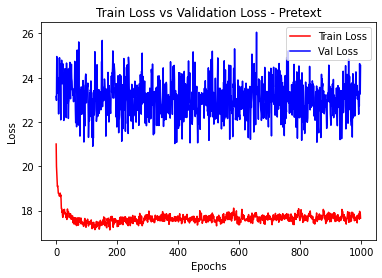

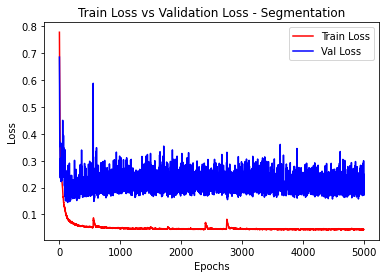

In [4]:
def plot_train_val_history(epoch, loss_history, val_history, title):
    plt.plot([el for el in range(epoch)], loss_history[:epoch], 'r', label='Train Loss')
    plt.plot([el for el in range(epoch)], val_history[:epoch], 'b', label='Val Loss')
    plt.title(f'Train Loss vs Validation Loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

path_segmentation = './saved_models/segmentation_checkpoint_contrastive.pth'
path_pretext = './saved_models/contrastive_checkpoint_pretext.pth'
epoch_ptx, loss_history_ptx, val_history_ptx = utils.get_train_history(path=path_pretext)
epoch_seg, loss_history_seg, val_history_seg = utils.get_train_history(path=path_segmentation)
plot_train_val_history(epoch_ptx, loss_history_ptx, val_history_ptx, title='Pretext')
plot_train_val_history(epoch_seg, loss_history_seg, val_history_seg, title='Segmentation')